# AVM Analysis




In [1]:
# -------------------------------------------------------------------
# Setup cell — place this at the top of every analysis notebook
# -------------------------------------------------------------------
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.formula.api as smf
import matplotlib.ticker as mtick

df = pd.read_csv("../datasets/customer_shopping_data_v10.csv")
sns.set_theme(style="whitegrid")

color1 = '#FF9E9D'  # Coral Pink
color2 = '#FFC785'  # Peach
color3 = '#FFF59D'  # Light Lemon
color4 = '#A0E6A6'  # Mint Green
color5 = '#87C8FF'  # Sky Blue
color6 = '#C4A2FF'  # Lavender

1. shopping_mall ↔ total_spend <br>
Which shopping mall generates the highest revenue?


Total revenue per shopping mall:
       shopping_mall  total_revenue
5   Mall of Istanbul    50872481.68
4             Kanyon    50554231.10
6          Metrocity    37302787.33
7       Metropol AVM    25379913.19
3       Istinye Park    24618827.68
9       Zorlu Center    12901053.82
0        Cevahir AVM    12645138.20
8     Viaport Outlet    12521339.72
1  Emaar Square Mall    12406100.29
2     Forum Istanbul    12303921.24


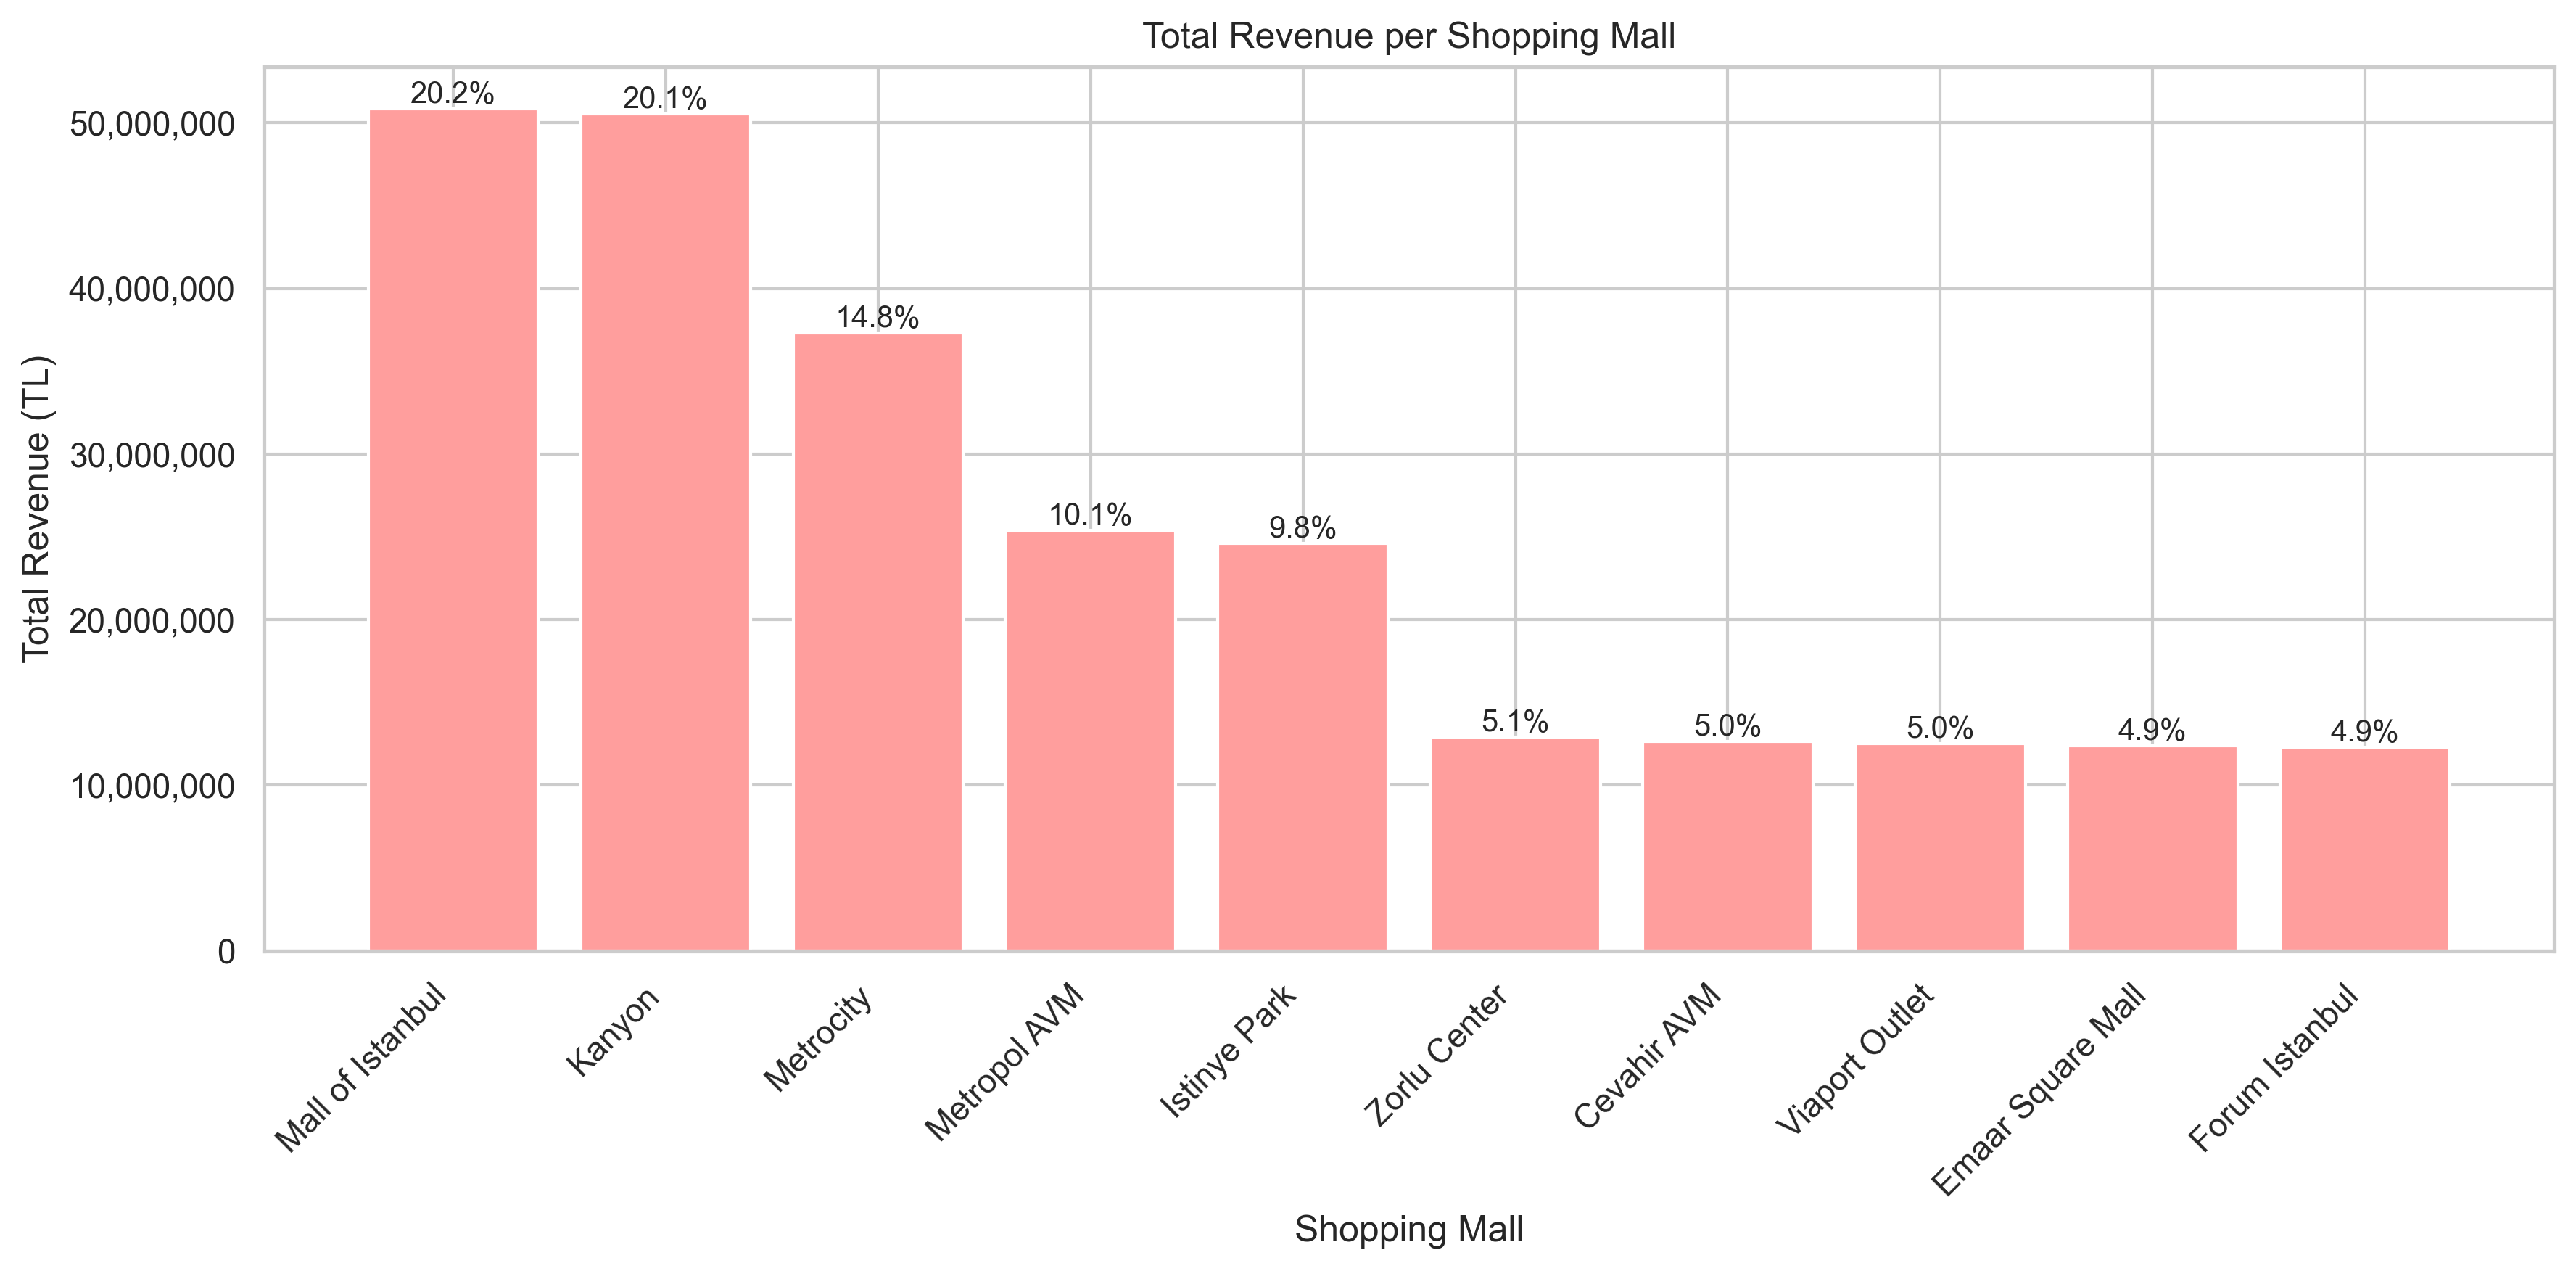

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Group by shopping mall and sum total spend
mall_revenue = (
    df.groupby("shopping_mall")["total_price"]
      .sum()
      .reset_index(name="total_revenue")
      .sort_values("total_revenue", ascending=False)
)

# 2. Display the table
print("\nTotal revenue per shopping mall:")
print(mall_revenue)

# 3. Calculate total revenue overall
total_all_malls = mall_revenue["total_revenue"].sum()

# 4. Plot vertical bar chart
plt.figure(figsize=(12,6), dpi=300)
bars = plt.bar(
    mall_revenue["shopping_mall"],
    mall_revenue["total_revenue"],
    color=color1
)

plt.ylabel("Total Revenue (TL)")
plt.xlabel("Shopping Mall")
plt.title("Total Revenue per Shopping Mall")

# Make y-axis show plain numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45, ha="right")

# Annotate percentages above bars
for bar, value in zip(bars, mall_revenue["total_revenue"]):
    percent = (value / total_all_malls) * 100
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{percent:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.savefig("dataset_mall_analysis_figures/dataset_mall_analysis.png", dpi=300)
plt.show()

2. shopping_mall ↔ avg_basket_value <br>
Does the average basket value differ across shopping malls?

                            OLS Regression Results                            
Dep. Variable:            total_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5121
Date:                Thu, 10 Jul 2025   Prob (F-statistic):              0.867
Time:                        12:12:27   Log-Likelihood:            -9.7141e+05
No. Observations:               99457   AIC:                         1.943e+06
Df Residuals:                   99447   BIC:                         1.943e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/var/folders/tw/ngdtxtj50klg2qdy83nmydxh0000gn/T/ipykernel_1795/3584388823.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


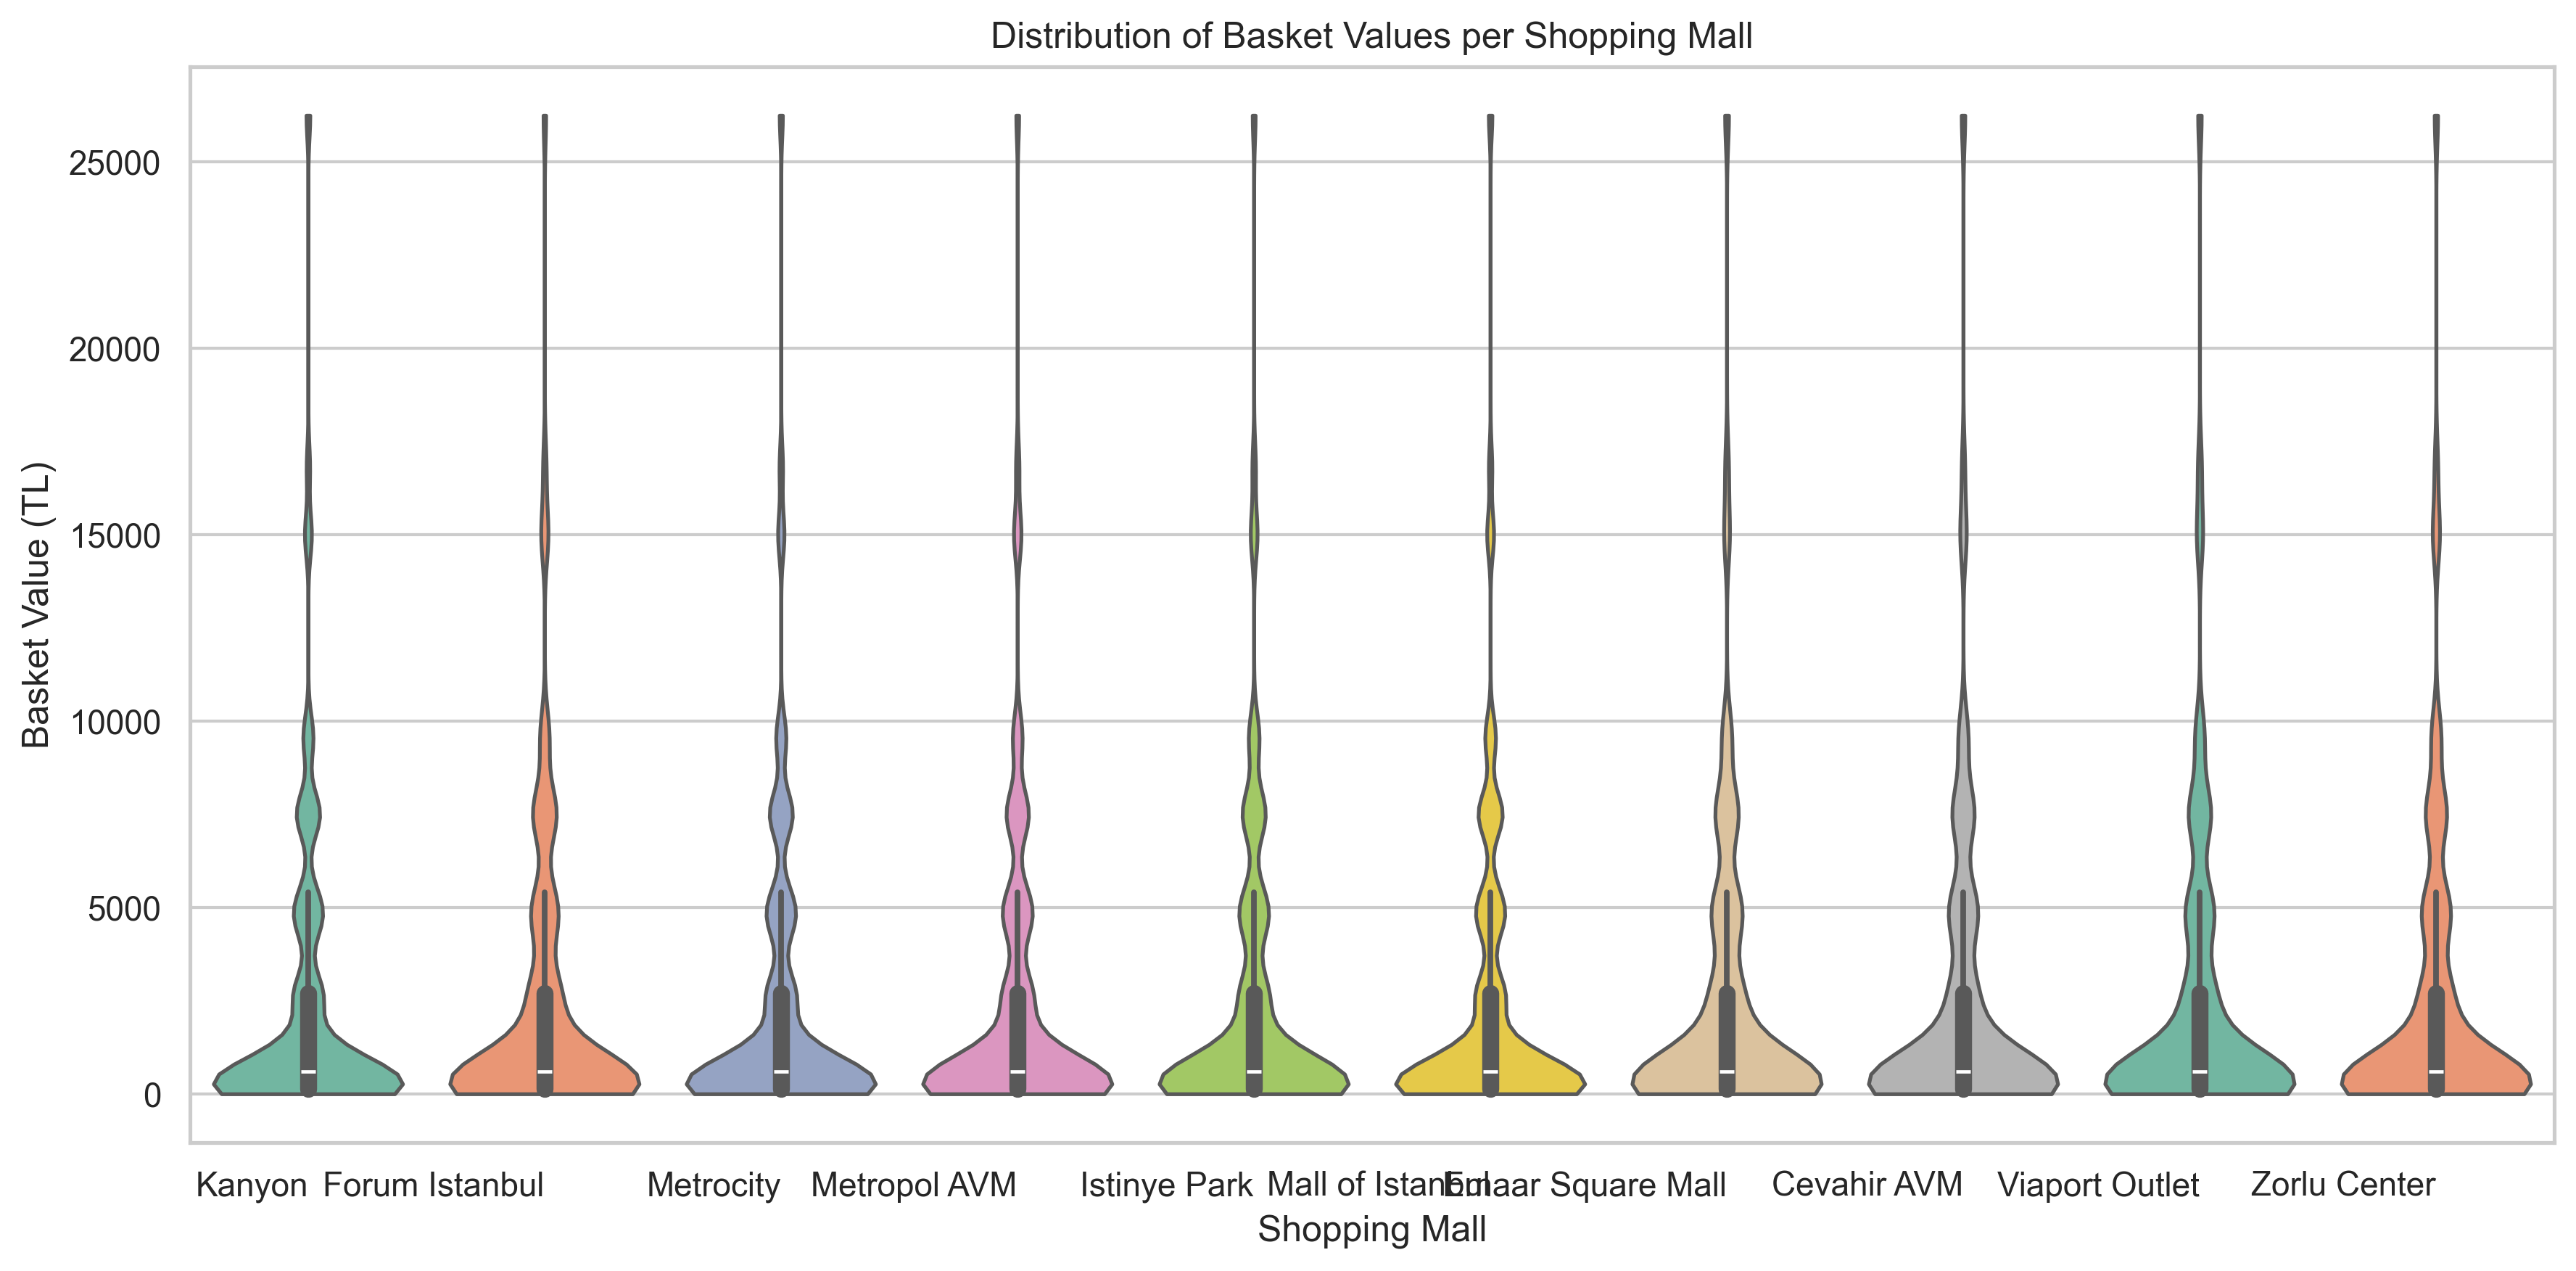

In [3]:
# 1. OLS regression to test statistical significance
model = smf.ols('total_price ~ C(shopping_mall)', data=df).fit()

# Print regression summary
print(model.summary())

# Interpret significance (global F-test)
anova_pvalue = model.f_pvalue

if anova_pvalue < 0.05:
    print(f"✅ Significant difference: Shopping mall is associated with average basket value. (p={anova_pvalue:.4f})")
else:
    print(f"❌ No significant difference in average basket value across malls. (p={anova_pvalue:.4f})")

# 2. Violin plot of basket values per shopping mall
plt.figure(figsize=(12,6), dpi=300)
sns.violinplot(
    data=df,
    x="shopping_mall",
    y="total_price",
    inner="box",   # Show median and quartiles inside the violin
    cut=0,
    palette="Set2"
)
plt.xlabel("Shopping Mall")
plt.ylabel("Basket Value (TL)")
plt.title("Distribution of Basket Values per Shopping Mall")
plt.xticks(ha="right")
plt.tight_layout()
plt.savefig("dataset_mall_analysis_figures/mall_avg_basket_value.png", dpi=300)
plt.show()


3. shopping_mall ↔ transaction_count <br>
Traffic volume by shopping mall


Sample of daily transaction counts:
  invoice_date      shopping_mall  daily_transaction_count
0   2021-01-01        Cevahir AVM                        4
1   2021-01-01  Emaar Square Mall                        7
2   2021-01-01     Forum Istanbul                        2
3   2021-01-01       Istinye Park                       12
4   2021-01-01             Kanyon                       19

OLS Regression Results (ANOVA on daily transaction counts):
                               OLS Regression Results                              
Dep. Variable:     daily_transaction_count   R-squared:                       0.819
Model:                                 OLS   Adj. R-squared:                  0.819
Method:                      Least Squares   F-statistic:                     4000.
Date:                     Thu, 10 Jul 2025   Prob (F-statistic):               0.00
Time:                             12:12:28   Log-Likelihood:                -21225.
No. Observations:                     7963  

/var/folders/tw/ngdtxtj50klg2qdy83nmydxh0000gn/T/ipykernel_1795/3918254745.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


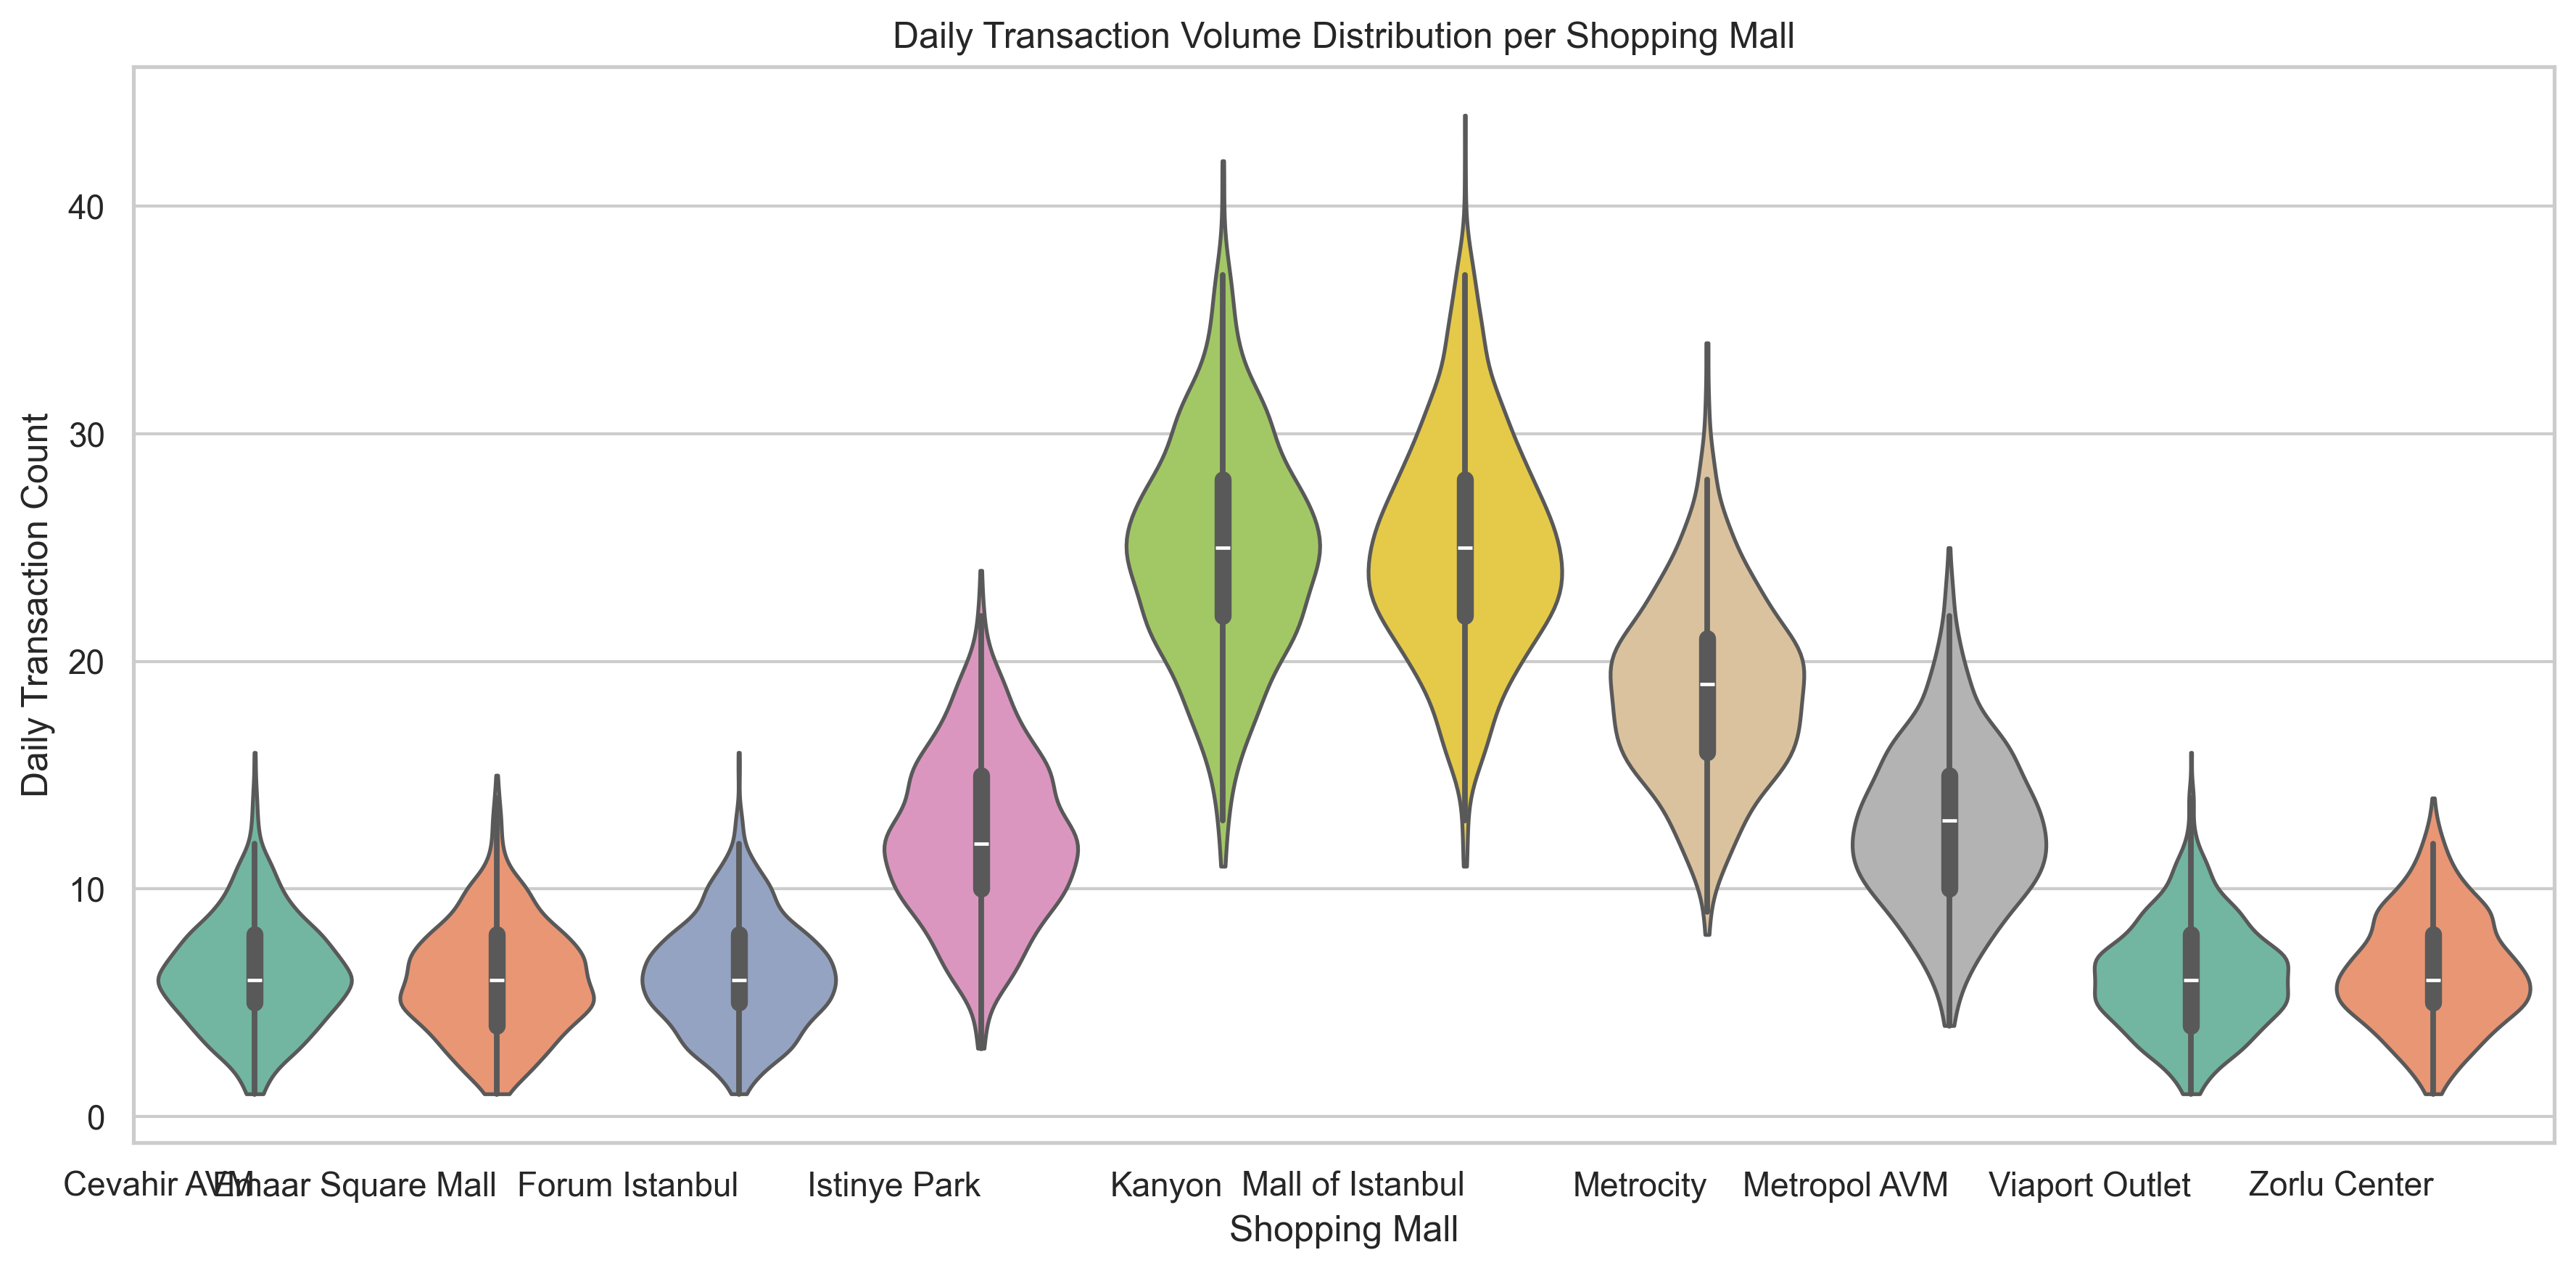

In [4]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"])

# 1. Daily transaction counts per shopping mall
daily_traffic = (
    df.groupby([df["invoice_date"].dt.date, "shopping_mall"], observed=False)
      .size()
      .reset_index(name="daily_transaction_count")
)

print("\nSample of daily transaction counts:")
print(daily_traffic.head())

# 2. OLS regression (ANOVA) on daily transaction counts
model = smf.ols(
    formula="daily_transaction_count ~ C(shopping_mall)",
    data=daily_traffic
).fit()

print("\nOLS Regression Results (ANOVA on daily transaction counts):")
print(model.summary())

p_value = model.f_pvalue
if p_value < 0.05:
    print(f"\n✅ Significant differences in daily transaction counts across shopping malls. (p = {p_value:.4f})")
else:
    print(f"\n❌ No significant differences in daily transaction counts across shopping malls. (p = {p_value:.4f})")

# 3. Violin plot of daily transaction counts
plt.figure(figsize=(12,6), dpi=300)
sns.violinplot(
    data=daily_traffic,
    x="shopping_mall",
    y="daily_transaction_count",
    inner="box",
    cut=0,
    palette="Set2"
)
plt.xlabel("Shopping Mall")
plt.ylabel("Daily Transaction Count")
plt.title("Daily Transaction Volume Distribution per Shopping Mall")
plt.xticks(ha="right")
plt.tight_layout()
plt.savefig('dataset_mall_analysis_figures/mall_daily_transaction.png', dpi=300)
plt.show()


4. shopping_mall ↔ season <br>
Seasonal variation in shopping mall performance

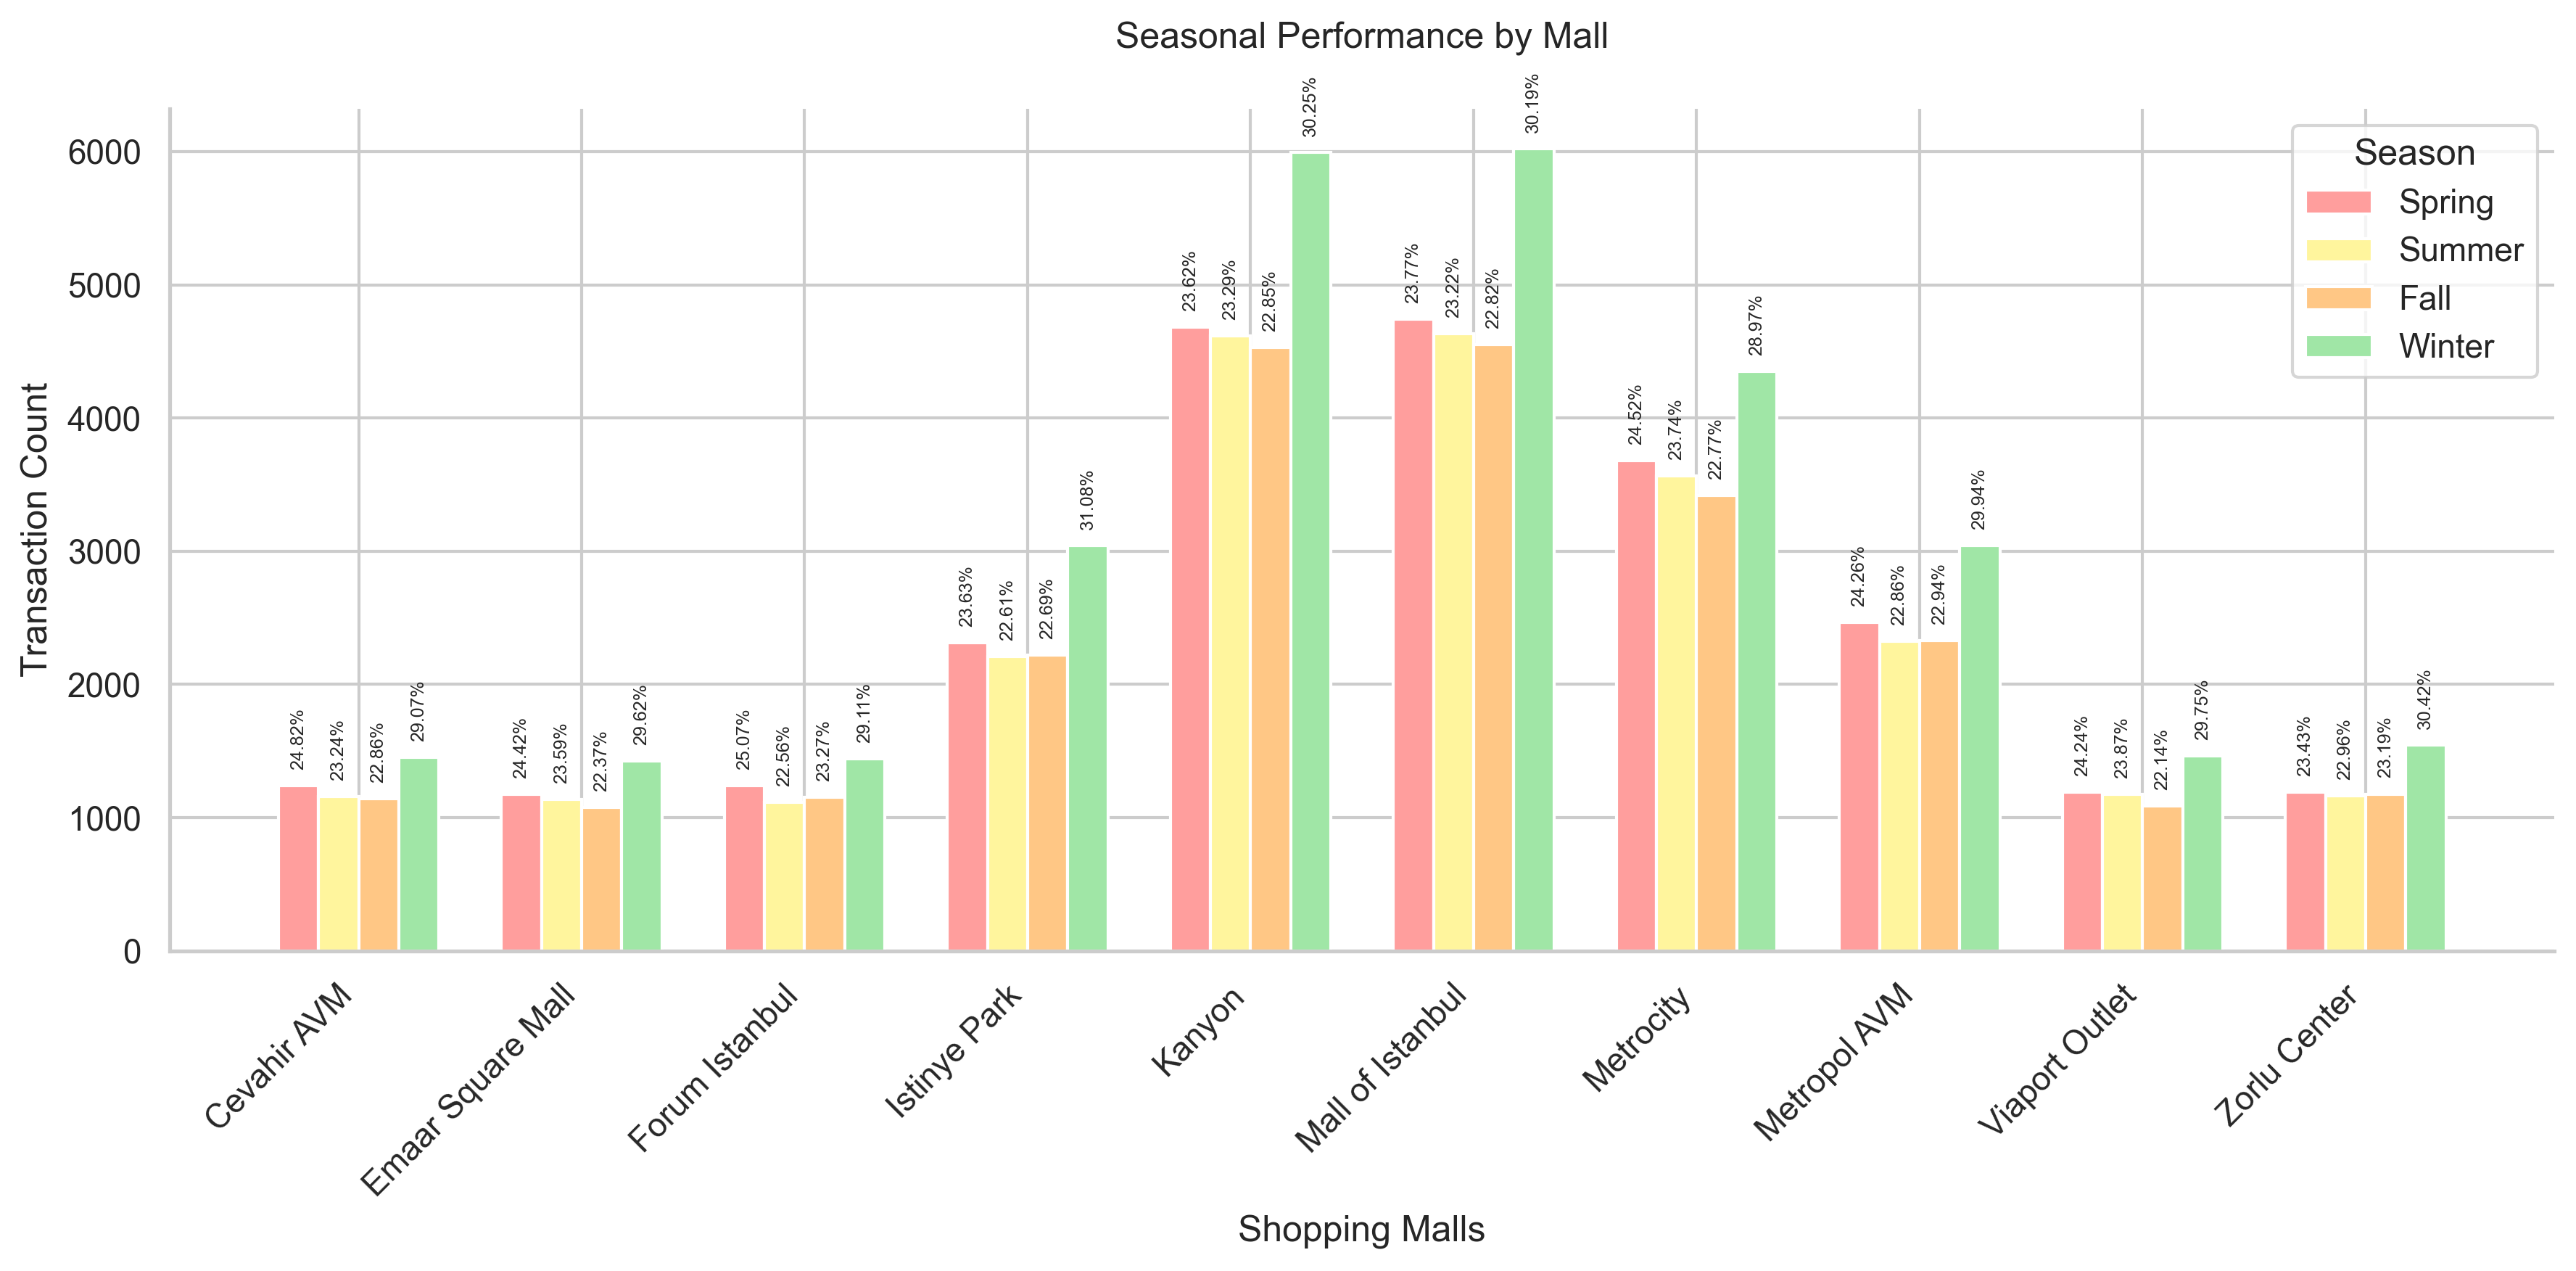


Observed counts:
 season             Fall  Spring  Summer  Winter
shopping_mall                                  
Cevahir AVM        1141    1239    1160    1451
Emaar Square Mall  1076    1175    1135    1425
Forum Istanbul     1151    1240    1116    1440
Istinye Park       2219    2311    2211    3040
Kanyon             4529    4682    4616    5996
Mall of Istanbul   4550    4741    4631    6021
Metrocity          3418    3681    3563    4349
Metropol AVM       2331    2465    2323    3042
Viaport Outlet     1088    1191    1173    1462
Zorlu Center       1177    1189    1165    1544

Expected counts under H0:
                     Spring   Summer     Fall   Winter
Cevahir AVM        1138.14  1200.06  1158.86  1493.93
Emaar Square Mall  1097.09  1156.78  1117.07  1440.05
Forum Istanbul     1128.11  1189.48  1148.65  1480.76
Istinye Park       2230.44  2351.80  2271.06  2927.70
Kanyon             4520.40  4766.35  4602.72  5933.53
Mall of Istanbul   4547.77  4795.21  4630.58  5969.45

In [5]:
# ╔══════════════════════════════════════════════════════════════╗
# ║ ANALYSIS 4: Seasonal variation in shopping mall performance ║
# ╚══════════════════════════════════════════════════════════════╝

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create a contingency table: rows = malls, columns = seasons
ct = pd.crosstab(df["shopping_mall"], df["season"])
malls = ct.index.tolist()
seasons = ["Spring", "Summer", "Fall", "Winter"]

x = np.arange(len(malls))
width = 0.18

# Define colors for each season
season_colors = {
    "Spring": color1,
    "Summer": color3,
    "Fall": color2,
    "Winter": color4
}

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12,6), dpi=300)

for i, s in enumerate(seasons):
    counts = ct[s].values
    barpos = x + (i - 1.5) * width
    ax.bar(
        barpos,
        counts,
        width=width,
        color=season_colors[s],
        label=s
    )
    
    # Add percentage labels on top of bars
    pct = (counts / ct.sum(axis=1).values) * 100
    for j, (c, p) in enumerate(zip(counts, pct)):
        ax.text(
            barpos[j],
            c + max(ct.values.max() * 0.02, 1),
            f"{p:.2f}%",
            ha="center",
            va="bottom",
            fontsize=6,
            rotation=90
        )

# Configure axes and legend
ax.set_xticks(x)
ax.set_xticklabels(malls, rotation=45, ha="right")
ax.set_xlabel("Shopping Malls")
ax.set_ylabel("Transaction Count")
ax.set_title("Seasonal Performance by Mall", pad=20)
ax.legend(title="Season")
sns.despine()
plt.tight_layout()

# Save the figure
plt.savefig("dataset_mall_analysis_figures/shopping_mall_category.png", dpi=300)
plt.show()

# Perform Chi-squared test of independence
chi2, p, dof, expected = stats.chi2_contingency(ct)

# Display observed counts
print("\nObserved counts:\n", ct)

# Display expected counts under the null hypothesis (independence)
print("\nExpected counts under H0:\n", pd.DataFrame(expected, index=malls, columns=seasons).round(2))

# Show test statistics
print(f"\nχ² = {chi2:.4f}  (df = {dof})   p-value = {p:.4f}")

# Interpretation based on p-value
if p < 0.05:
    print("✅ At the 95% confidence level, mall performance **varies by season**.")
else:
    print("❌ At the 95% confidence level, there is **no significant seasonal effect on mall performance.**")


5. shopping_mall ↔ day‑of‑week <br>
Daily traffic patterns across shopping malls

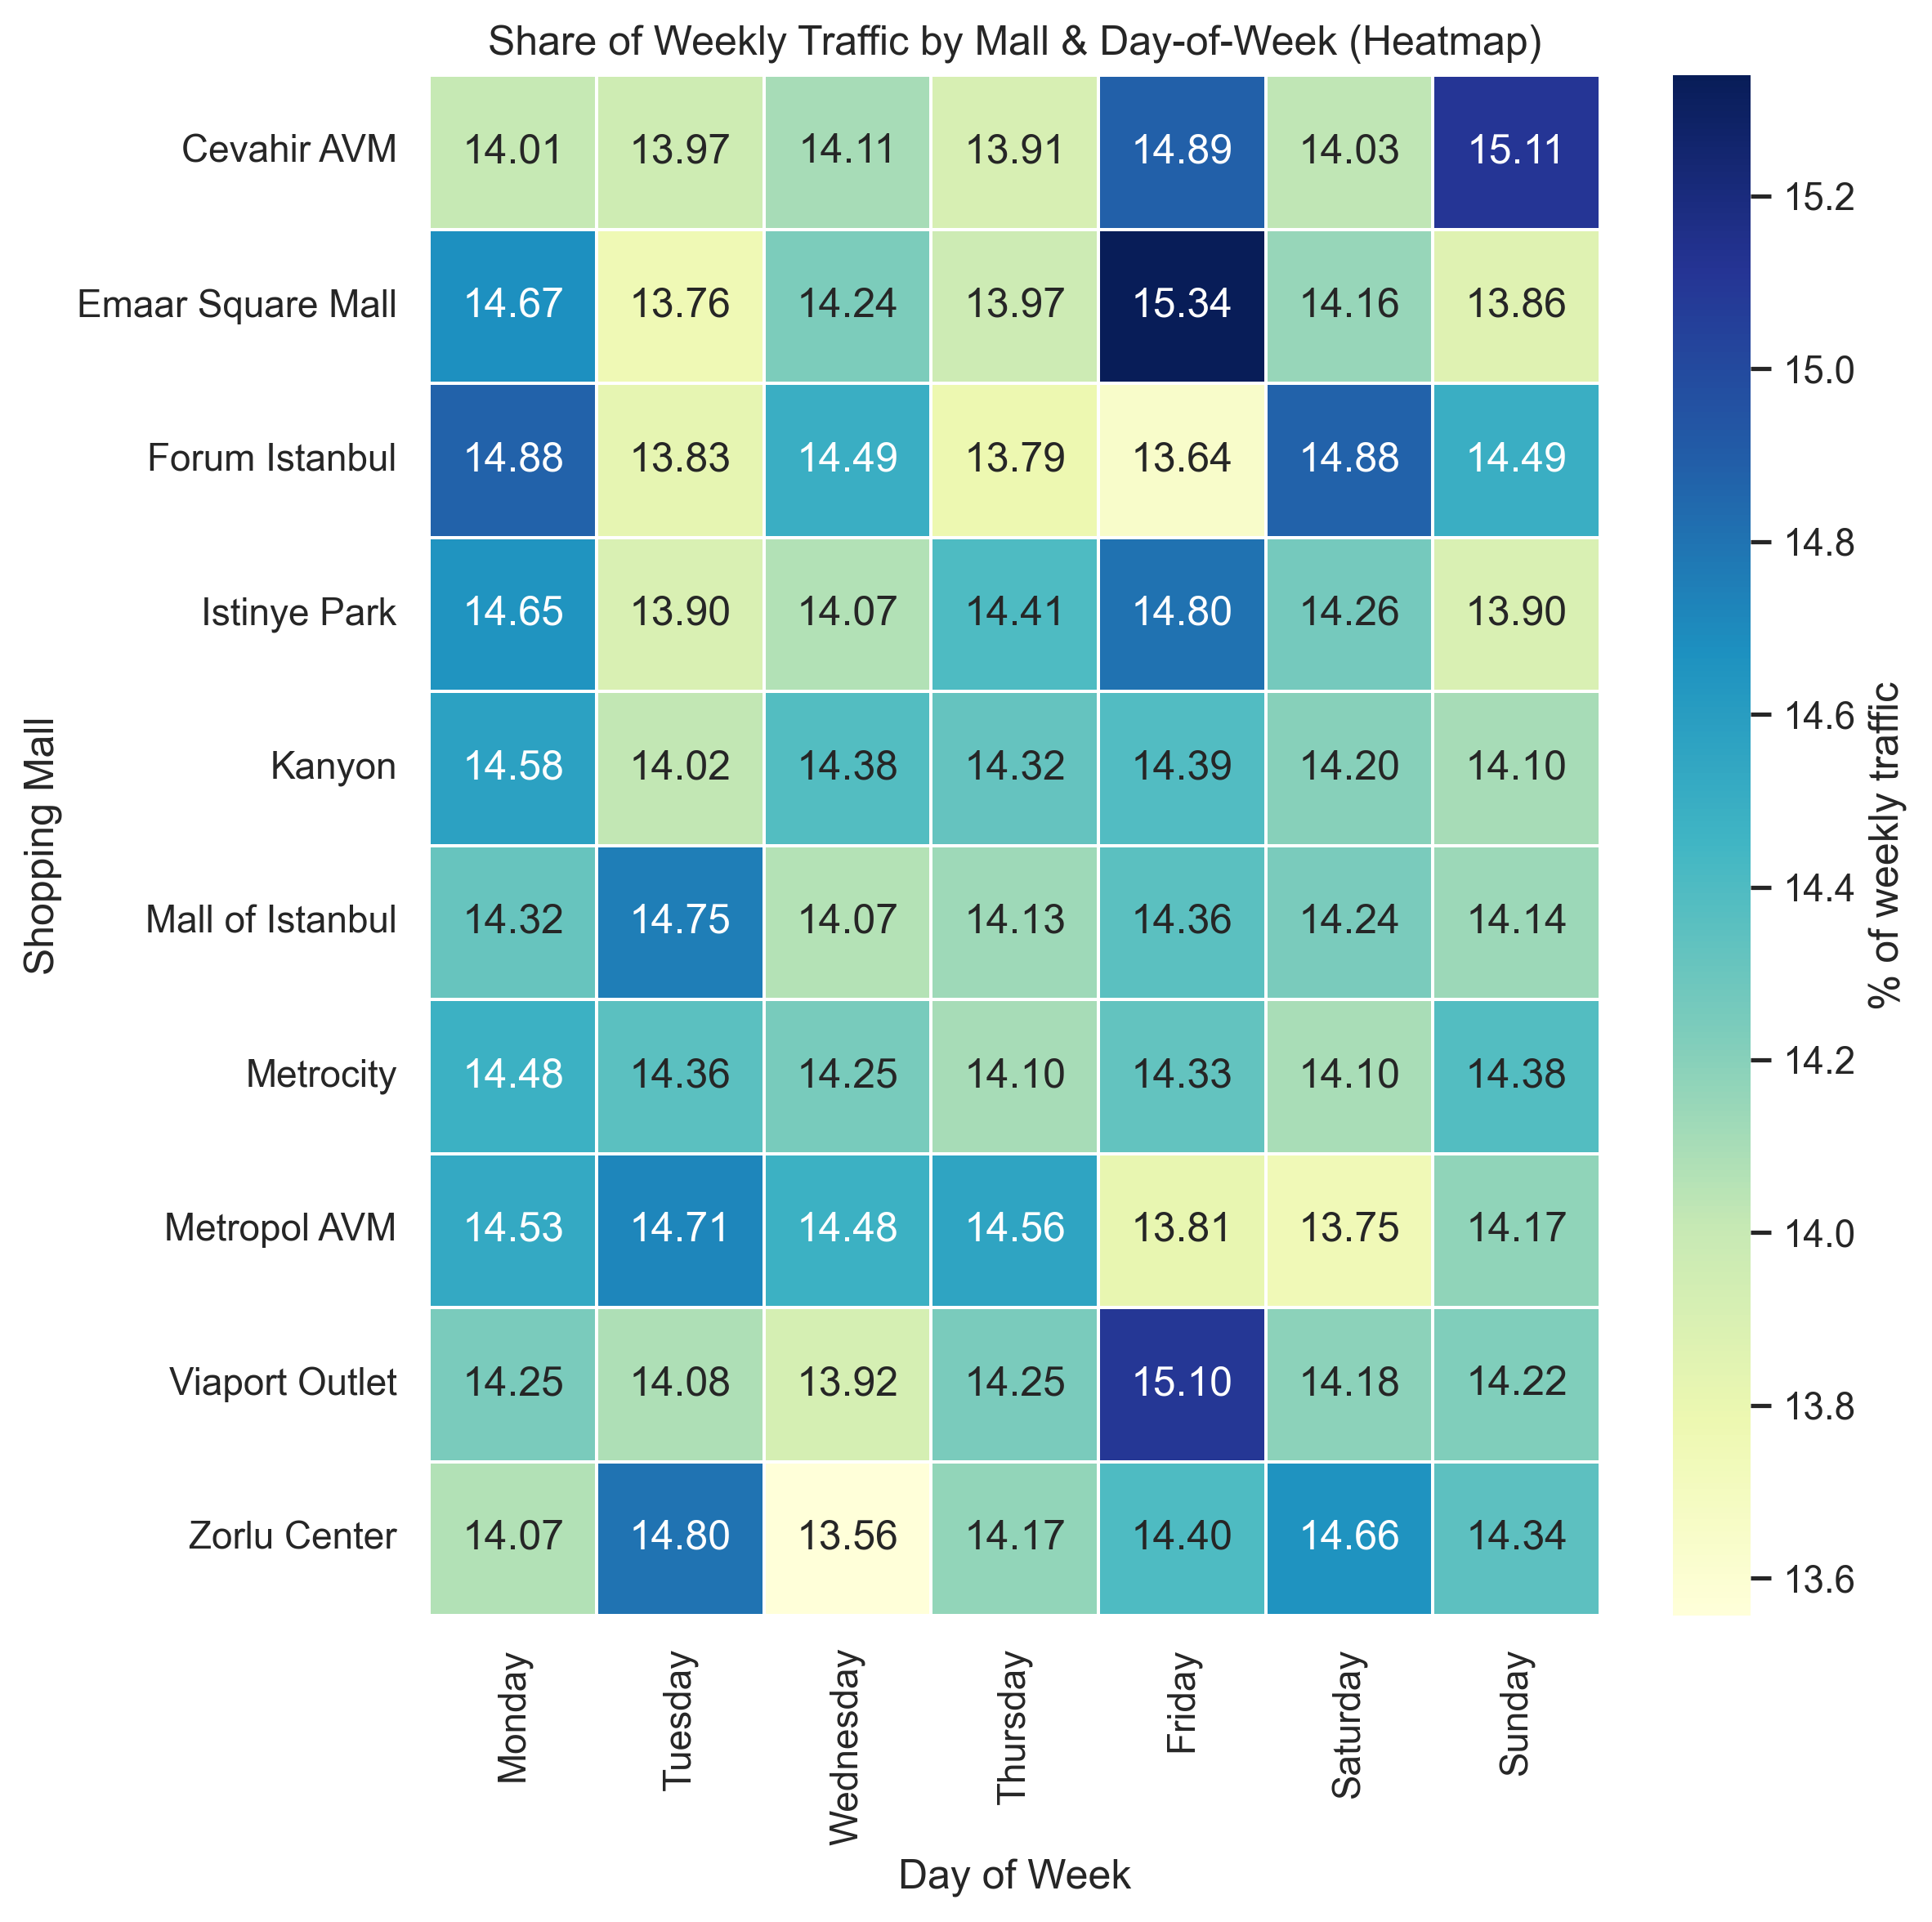


Observed counts:

weekday            Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
shopping_mall                                                               
Cevahir AVM           699      697        704       694     743       700   
Emaar Square Mall     706      662        685       672     738       681   
Forum Istanbul        736      684        717       682     675       736   
Istinye Park         1433     1360       1376      1409    1448      1395   
Kanyon               2890     2779       2851      2839    2853      2815   
Mall of Istanbul     2855     2942       2805      2818    2863      2840   
Metrocity            2174     2155       2139      2117    2151      2116   
Metropol AVM         1476     1495       1471      1479    1403      1397   
Viaport Outlet        700      692        684       700     742       697   
Zorlu Center          714      751        688       719     731       744   

weekday            Sunday  
shopping_mall              


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Ensure invoice_date is datetime
df["invoice_date"] = pd.to_datetime(df["invoice_date"], errors="coerce")

# 2. Extract day name (weekday)
df["weekday"] = df["invoice_date"].dt.day_name()

# 3. Build contingency table: rows = malls, columns = weekdays
ct = pd.crosstab(
    df["shopping_mall"],
    df["weekday"]
).reindex(
    columns=[
        "Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"
    ]
)

# 4. Compute % share per row (mall)
heatmap_data = ct.div(ct.sum(axis=1), axis=0) * 100

# 5. Plot heatmap
plt.figure(figsize=(8,8), dpi=300)
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "% of weekly traffic"},
    color=color1
)
plt.title("Share of Weekly Traffic by Mall & Day-of-Week (Heatmap)")
plt.ylabel("Shopping Mall")
plt.xlabel("Day of Week")
plt.tight_layout()
plt.savefig("dataset_mall_analysis_figures/shopping_mall_day_of_week.png", dpi=300)
plt.show()

# 6. Chi-squared test of independence
chi2, p, dof, expected = stats.chi2_contingency(ct)

# 7. Print results in clean format
print("\nObserved counts:\n")
print(ct)

print("\nExpected counts under H0 (independence):\n")
print(
    pd.DataFrame(expected, index=ct.index, columns=ct.columns).round(2)
)

print(f"\nχ² = {chi2:.4f}  (df = {dof})   p-value = {p:.4f}")

if p < 0.05:
    print(
        "✅ At the 95% confidence level, traffic pattern **differs across days** for different malls."
    )
else:
    print(
        "❌ At the 95% confidence level, there is **no significant day-of-week effect on mall traffic distribution.**"
    )


7. shopping_mall ↔ category <br>
Which product categories are preferred at which shopping malls?

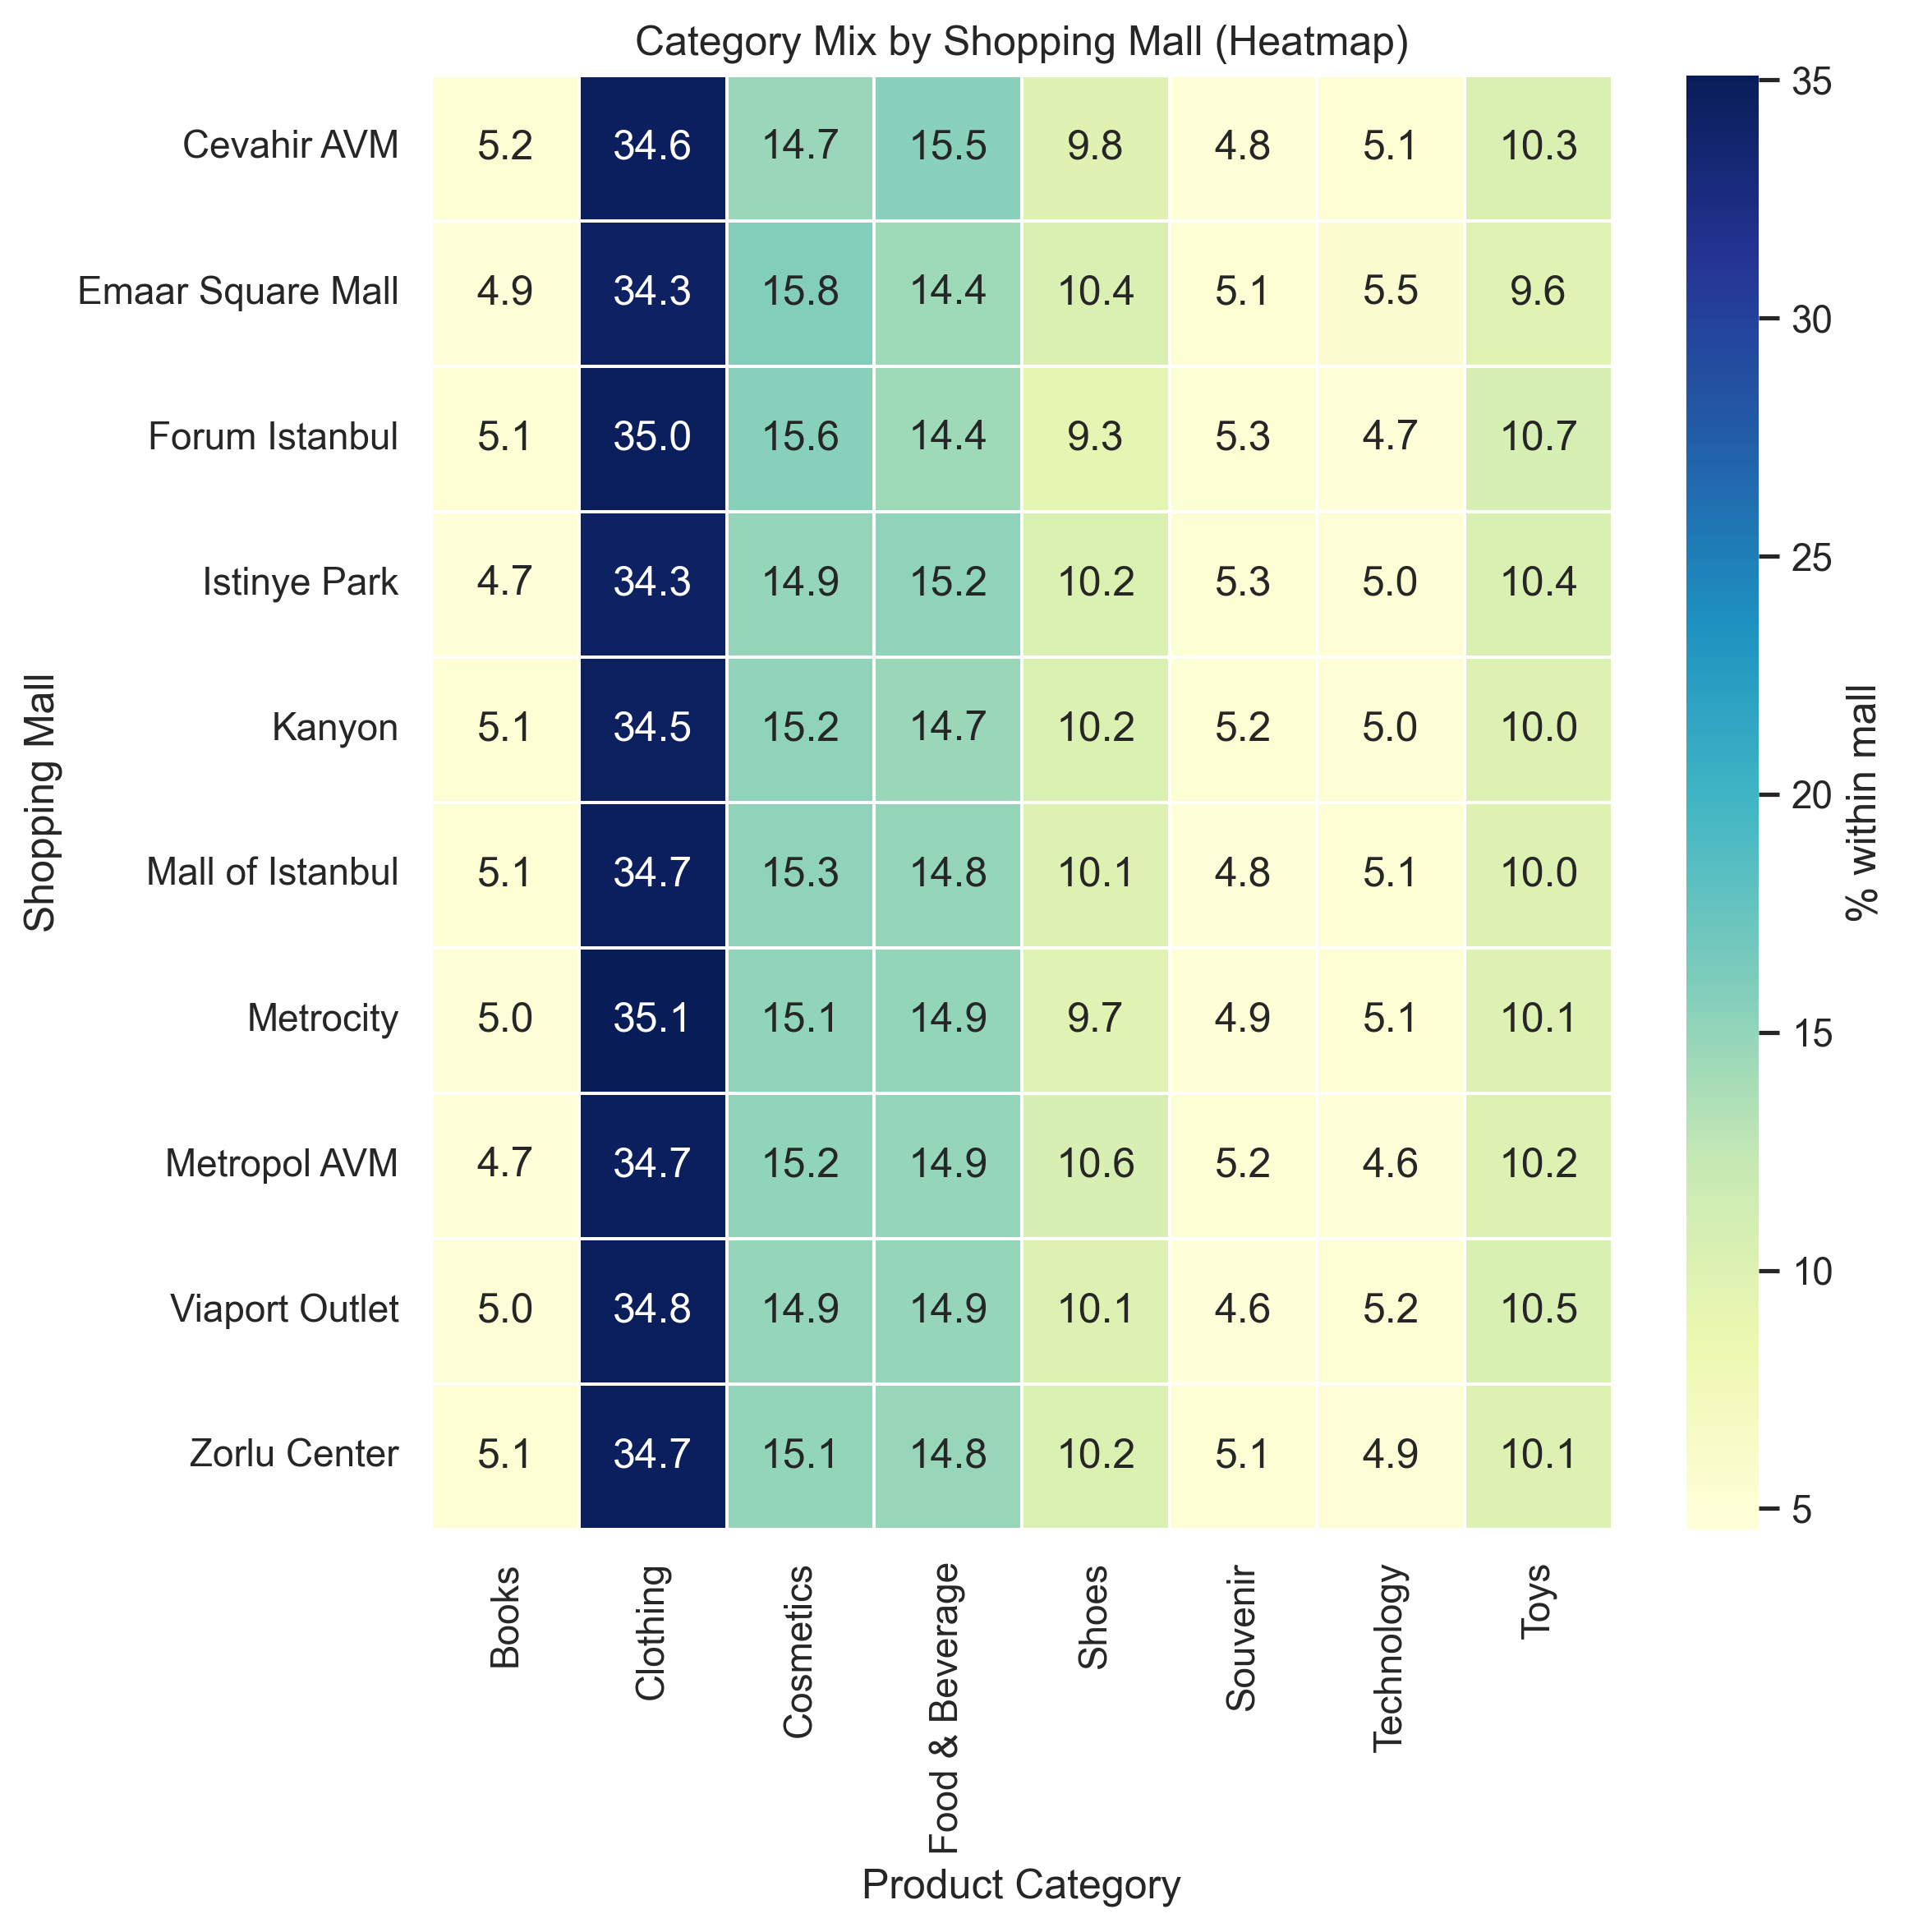


Observed counts:

category           Books  Clothing  Cosmetics  Food & Beverage  Shoes  \
shopping_mall                                                           
Cevahir AVM          258      1729        732              772    490   
Emaar Square Mall    236      1651        760              692    498   
Forum Istanbul       252      1729        770              712    458   
Istinye Park         462      3353       1458             1490   1001   
Kanyon              1013      6840       3023             2909   2017   
Mall of Istanbul    1025      6923       3050             2957   2023   
Metrocity            752      5268       2265             2244   1457   
Metropol AVM         476      3525       1541             1517   1074   
Viaport Outlet       246      1708        734              733    497   
Zorlu Center         261      1761        764              750    519   

category           Souvenir  Technology  Toys  
shopping_mall                                  
Cevahir 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Cross-tabulation: rows = shopping malls, columns = product categories
ct = pd.crosstab(
    df["shopping_mall"],
    df["category"]
)

# 2. Compute % share within each mall
prop = ct.divide(ct.sum(axis=1), axis=0) * 100

# 3. Heatmap of category composition
plt.figure(figsize=(8,8), dpi=300)
sns.heatmap(
    prop,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "% within mall"},
    color=color1
)
plt.title("Category Mix by Shopping Mall (Heatmap)")
plt.ylabel("Shopping Mall")
plt.xlabel("Product Category")
plt.tight_layout()
plt.savefig("dataset_mall_analysis_figures/shopping_mall_category.png", dpi=300)
plt.show()

# 4. Chi-squared test of independence
chi2, p, dof, expected = stats.chi2_contingency(ct)

# 5. Display results in a clean format
print("\nObserved counts:\n")
print(ct)

print("\nExpected counts under H0 (independence):\n")
print(
    pd.DataFrame(expected, index=ct.index, columns=ct.columns).round(2)
)

print(f"\nχ² = {chi2:.4f}  (df = {dof})   p-value = {p:.4f}")

if p < 0.05:
    print(
        "✅ At the 95% confidence level, category preference **differs by mall**."
    )
else:
    print(
        "❌ At the 95% confidence level, there is **no significant association between mall and category preference.**"
    )
